<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Dungeon_First_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pylatexenc==2.10 && pip install qiskit==1.0.2 && pip install qiskit-aer==0.13.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=11bfe00a813baa397384fbd86a338f2bd30b3a3a998fc11076f37dd73c932772
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 40.6 MB/s eta 0:00:00


In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.8 MB/s eta 0:00:00
time: 476 µs (started: 2024-03-28 12:28:42 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization.state_visualization import array_to_latex
from qiskit_aer import Aer
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
from qiskit.circuit.library import QFT
from qiskit.circuit.library import MCMT, YGate, RYGate
import networkx as nx
from collections import deque
import random
from PIL import Image, ImageDraw

time: 23.2 ms (started: 2024-03-28 12:32:38 +00:00)


In [ ]:
"""
Utility function to count the number of 1s in a string
"""
def count_ones(string):
    count = 0
    for char in string:
        if char == '1':
            count += 1
    return count
"""
Utility function to transform the circuit output string in a grid
"""
def string_to_grid(s, size):
    return [list(s[i:i+size]) for i in range(0, len(s), size)]

"""
Utility function to check if a given grid is a polyomino
"""
def is_polyomino(grid):
    rows, cols = len(grid), len(grid[0])
    visited = [[False] * cols for _ in range(rows)]

    # Search a '1'
    start_i, start_j = None, None
    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == '1':
                start_i, start_j = i, j
                break

    if start_i is None or start_j is None:
        # No '1' found
        return False

    # Start BFS
    queue = deque([(start_i, start_j)])
    visited[start_i][start_j] = True

    while queue:
        i, j = queue.popleft()

        # Check neighbors horizontally and vertically
        neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
        for ni, nj in neighbors:
            if 0 <= ni < rows and 0 <= nj < cols and grid[ni][nj] == '1' and not visited[ni][nj]:
                queue.append((ni, nj))
                visited[ni][nj] = True

    # Check if all '1's had been visited
    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == '1' and not visited[i][j]:
                return False

    return True

"""
Utility function to create a connected 3x3 grid graph
"""

def create_connected_grid_graph(rows, cols):
    G = nx.Graph()

    nodes = [(i, j) for i in range(rows) for j in range(cols)]
    G.add_nodes_from(nodes)

    # Connect all nodes to each other
    for i in range(rows):
        for j in range(cols):
            if i < rows - 1:
                G.add_edge((i, j), (i + 1, j))  # Connect to the next node in the same column
            if j < cols - 1:
                G.add_edge((i, j), (i, j + 1))  # Connect to the next node in the same row

    return G


time: 3.03 ms (started: 2024-03-28 12:30:18 +00:00)


## Checking the number of valid dungeon in a full randomization of the grid

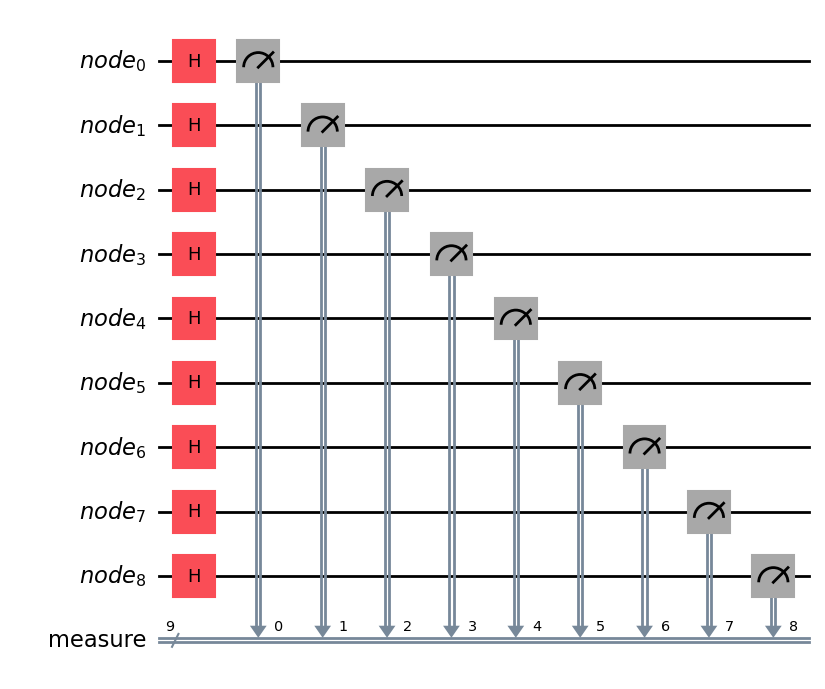

time: 659 ms (started: 2024-03-27 21:29:55 +00:00)


In [ ]:
"""
Creating the superposition of all possible combinations
"""
nodes = QuantumRegister(9, "node")
node_measurement = ClassicalRegister(9, "measure")

qc = QuantumCircuit(nodes, node_measurement)
qc.h(range(9))
qc.measure(nodes, node_measurement)
qc.draw("mpl")

In [ ]:
"""
Executing the job on the local simulator
"""
simulator = Aer.get_backend("qasm_simulator")
job = simulator.run(qc, shots=6561)
result = job.result()

time: 36.6 ms (started: 2024-03-27 21:29:56 +00:00)


In [ ]:
"""
Analyzing the results
"""
result = sorted(result.get_counts(qc).keys())
print("Results:")
print(result)

valid_polyominoes = list(filter(lambda x: is_polyomino(string_to_grid(x, 3)), result))

total_count = len(result)
valid_count = len(valid_polyominoes)
accuracy_percentage = (valid_count / total_count) * 100

print("Total count: " + str(total_count))
print("Valid count: " + str(valid_count))
print(f"Accuracy: {accuracy_percentage:.2f}%")

Results:
['000000000', '000000001', '000000010', '000000011', '000000100', '000000101', '000000110', '000000111', '000001000', '000001001', '000001010', '000001011', '000001100', '000001101', '000001110', '000001111', '000010000', '000010001', '000010010', '000010011', '000010100', '000010101', '000010110', '000010111', '000011000', '000011001', '000011010', '000011011', '000011100', '000011101', '000011110', '000011111', '000100000', '000100001', '000100010', '000100011', '000100100', '000100101', '000100110', '000100111', '000101000', '000101001', '000101010', '000101011', '000101100', '000101101', '000101110', '000101111', '000110000', '000110001', '000110010', '000110011', '000110100', '000110101', '000110110', '000110111', '000111000', '000111001', '000111010', '000111011', '000111100', '000111101', '000111110', '000111111', '001000000', '001000001', '001000010', '001000011', '001000100', '001000101', '001000110', '001000111', '001001000', '001001001', '001001010', '001001011', '0

## Adding the "not alone" constraint to check the change in accuracy

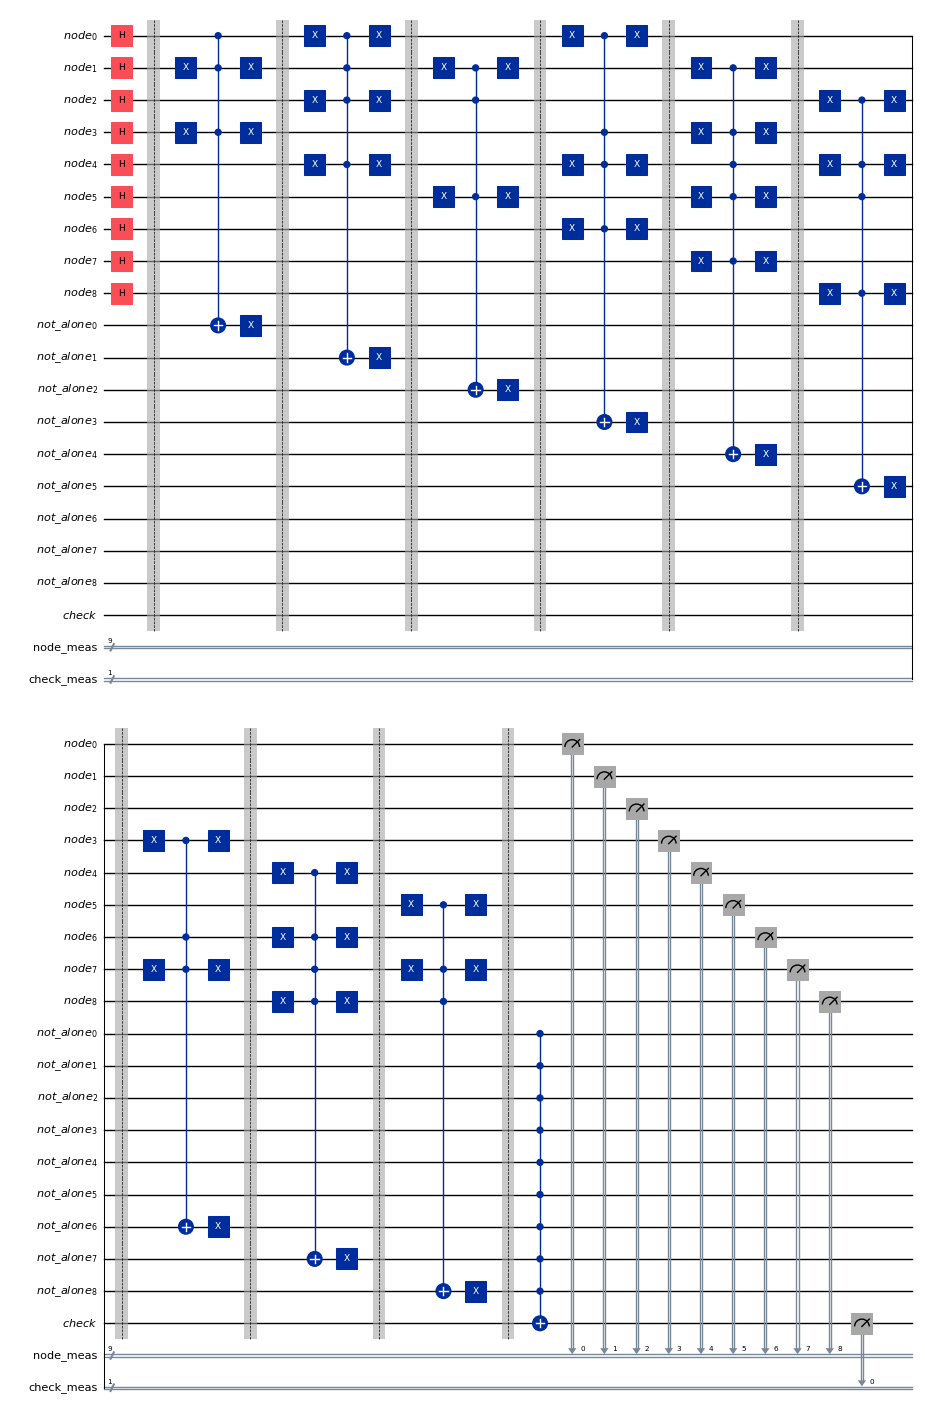

time: 3.21 s (started: 2024-03-27 22:29:24 +00:00)


In [ ]:
rows, cols = 3, 3
graph = create_connected_grid_graph(rows, cols)

nodes = QuantumRegister(9, "node")
not_alone = QuantumRegister(9, "not_alone")
check = QuantumRegister(1, "check")
node_measurement = ClassicalRegister(9, "node_meas")
check_measurement = ClassicalRegister(1, "check_meas")

qc = QuantumCircuit(nodes, node_measurement, not_alone, check_measurement, check)
qc.h(range(9))

# Logic: ¬(p ∧ ¬(p ∧ (q ∨ r)))
# Simplified: ¬ p ∨ q ∨ r

for index in range(9):
  qc.barrier()

  i, j = divmod(index, cols)
  connected_nodes = list(graph.neighbors((i, j)))
  connected_indices = [i * cols + j for i, j in connected_nodes]

  qc.x(connected_indices)

  mcx_nodes = connected_indices.copy()
  mcx_nodes.append(index)

  # execute or
  qc.mcx(mcx_nodes, not_alone[index])
  qc.x(not_alone[index])
  # reset
  qc.x(connected_indices)

qc.barrier()

qc.mcx(not_alone, check)

qc.measure(check, check_measurement)
qc.measure(nodes, node_measurement)

qc.draw("mpl", scale=0.5)

In [ ]:
simulator = Aer.get_backend("qasm_simulator")
job = simulator.run(qc, shots=65536)
result = job.result()


time: 953 ms (started: 2024-03-27 22:29:30 +00:00)


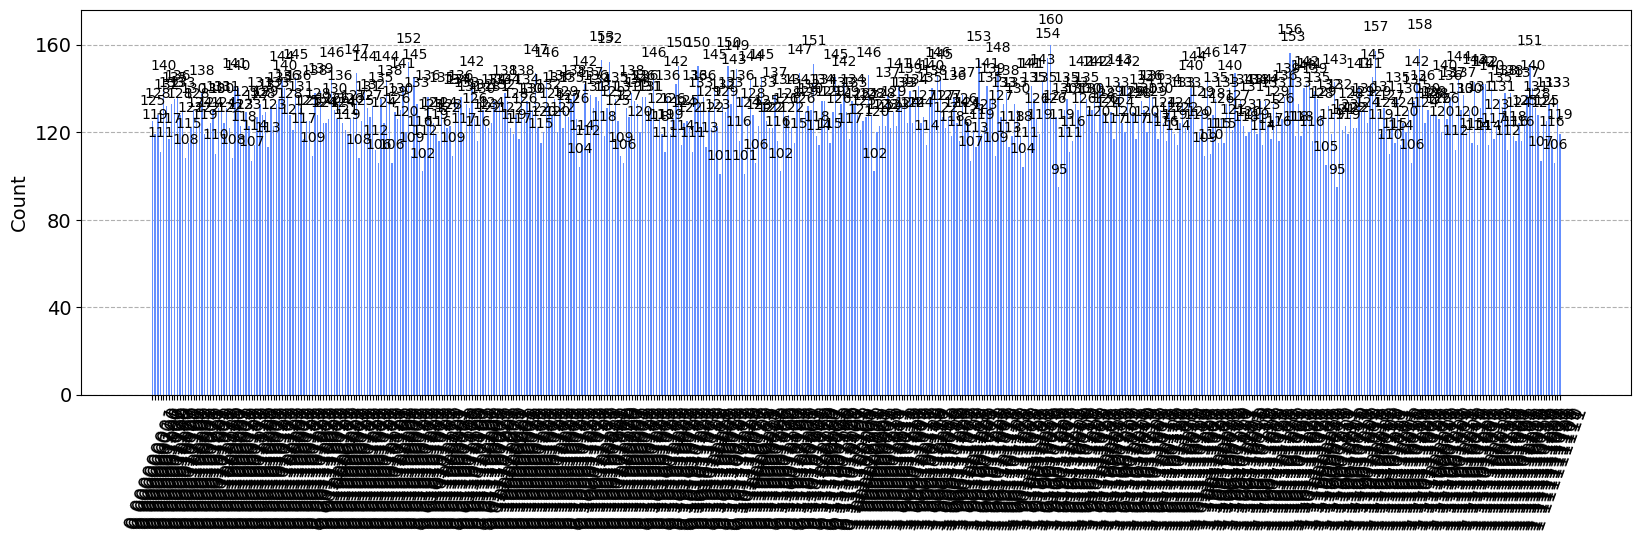

time: 5.1 s (started: 2024-03-27 21:29:58 +00:00)


In [ ]:
plot_histogram(result.get_counts(qc), figsize=(20, 5))

In [ ]:
result = sorted(result.get_counts(qc).keys())

print("Results:")
result = [s.split(' ')[1] for s in result if s.startswith('1')]
print(result)
valid_polyominoes = list(filter(lambda x: is_polyomino(string_to_grid(x, 3)), result))

total_count = len(result)
valid_count = len(valid_polyominoes)
accuracy_percentage = (valid_count / total_count) * 100

print("Total count: " + str(total_count))
print("Valid count: " + str(valid_count))
print(f"Accuracy: {accuracy_percentage:.2f}%")

Results:
['000000000', '000000011', '000000110', '000000111', '000001001', '000001011', '000001111', '000010010', '000010011', '000010110', '000010111', '000011000', '000011001', '000011010', '000011011', '000011110', '000011111', '000100100', '000100110', '000100111', '000101101', '000101111', '000110000', '000110010', '000110011', '000110100', '000110110', '000110111', '000111000', '000111001', '000111010', '000111011', '000111100', '000111101', '000111110', '000111111', '001001000', '001001001', '001001011', '001001110', '001001111', '001011000', '001011001', '001011010', '001011011', '001011110', '001011111', '001101100', '001101101', '001101110', '001101111', '001111000', '001111001', '001111010', '001111011', '001111100', '001111101', '001111110', '001111111', '010010000', '010010010', '010010011', '010010110', '010010111', '010011000', '010011001', '010011010', '010011011', '010011110', '010011111', '010110000', '010110010', '010110011', '010110100', '010110110', '010110111', '0

## Analyzing the percentage on different grid sizes

In [ ]:
for i in range(2, 10):
  nodes = QuantumRegister(i*i, "node")
  node_measurement = ClassicalRegister(i*i, "measure")

  qc = QuantumCircuit(nodes, node_measurement)
  qc.h(range(i*i))
  qc.measure(nodes, node_measurement)

  simulator = Aer.get_backend("qasm_simulator")
  job = simulator.run(qc, shots=500000)
  result = job.result()

  result = sorted(result.get_counts(qc).keys())

  valid_polyominoes = list(filter(lambda x: is_polyomino(string_to_grid(x, i)), result))

  total_count = len(result)
  valid_count = len(valid_polyominoes)
  accuracy_percentage = (valid_count / total_count) * 100

  print("----" + str(i) + "x" + str(i) + " grid ----")
  print("Total count: " + str(total_count))
  print("Valid count: " + str(valid_count))
  print(f"Percentage: {accuracy_percentage:.2f}%")

----2x2 grid ----
Total count: 16
Valid count: 13
Percentage: 81.25%
----3x3 grid ----
Total count: 512
Valid count: 218
Percentage: 42.58%
----4x4 grid ----
Total count: 65512
Valid count: 11500
Percentage: 17.55%
----5x5 grid ----
Total count: 496377
Valid count: 34102
Percentage: 6.87%
----6x6 grid ----
Total count: 499999
Valid count: 12751
Percentage: 2.55%
----7x7 grid ----
Total count: 500000
Valid count: 4278
Percentage: 0.86%
----8x8 grid ----
Total count: 500000
Valid count: 1361
Percentage: 0.27%
----9x9 grid ----
Total count: 500000
Valid count: 439
Percentage: 0.09%
time: 2min 53s (started: 2024-03-27 21:30:03 +00:00)


## After 3x3, we don't have enough ram for the simulator

In [ ]:
from qiskit_aer import QasmSimulator
from qiskit import transpile
from qiskit.circuit.library.standard_gates.multi_control_rotation_gates import MCXGate

for size in range(2,5):

  print("----" + str(size) + "x" + str(size) + " grid ----")
  rows, cols = size, size
  graph = create_connected_grid_graph(rows, cols)

  nodes = QuantumRegister(size*size, "node")
  not_alone = QuantumRegister(int(size*size), "not_alone")
  check = QuantumRegister(1, "check")
  node_measurement = ClassicalRegister(size*size, "node_meas")
  check_measurement = ClassicalRegister(1, "check_meas")

  qc = QuantumCircuit(nodes, node_measurement, not_alone, check_measurement, check)
  qc.h(range(size*size))


  for index in range(size*size):
    qc.barrier()

    i, j = divmod(index, cols)

    connected_nodes = list(graph.neighbors((i, j)))
    connected_indices = [i * cols + j for i, j in connected_nodes]

    qc.x(connected_indices)

    mcx_nodes = connected_indices.copy()
    mcx_nodes.append(index)

    # execute or
    mcx = MCXGate(2)
    ctrl = [nodes[x] for x in mcx_nodes]
    ctrl.append(not_alone[index])

    qc.append(mcx, qargs=[nodes[connected_indices[0]], nodes[connected_indices[1]], not_alone[index]])

    qc.x(not_alone[index])
    # reset
    qc.x(connected_indices)

  qc.barrier()

  qc.mcx(not_alone, check)

  qc.measure(nodes, node_measurement)
  qc.measure(check, check_measurement)


  simulator = Aer.get_backend("qasm_simulator")
  job = simulator.run(qc, shots=65000)
  result = job.result()

  result = sorted(result.get_counts(qc).keys())
  print(result)

  result = [s.split(' ')[1] for s in result if s.startswith('1')]
  valid_polyominoes = list(filter(lambda x: is_polyomino(string_to_grid(x, size)), result))

  total_count = len(result)
  valid_count = len(valid_polyominoes)
  accuracy_percentage = (valid_count / total_count) * 100

  print("Total count: " + str(total_count))
  print("Valid count: " + str(valid_count))
  print(f"Accuracy: {accuracy_percentage:.2f}%")


ERROR:  [Experiment 0] Insufficient memory to run circuit circuit-182 using the statevector simulator. Required memory: 131072M, max memory: 12978M


----4x4 grid ----


QiskitError: 'Data for experiment "circuit-182" could not be found.'

time: 26.3 ms (started: 2024-03-27 21:43:40 +00:00)


## Hybrid algorithm

In [ ]:
"""
Creating the superposition of all possible combinations
"""
nodes = QuantumRegister(5*5, "node")
node_measurement = ClassicalRegister(5*5, "measure")

qc = QuantumCircuit(nodes, node_measurement)
qc.h(range(5*5))
qc.measure(nodes, node_measurement)

"""
Executing the job on the local simulator
"""
simulator = Aer.get_backend("qasm_simulator")
job = simulator.run(qc, shots=200000)
result = job.result()

"""
Analyzing the results
"""
sorted_results = sorted(result.get_counts(qc).keys())

valid_polyominoes = list(filter(lambda x: is_polyomino(string_to_grid(x, 5)) and (count_ones(x)==12 or count_ones(x)==13), sorted_results))

total_count = len(sorted_results)
valid_count = len(valid_polyominoes)
accuracy_percentage = (valid_count / total_count) * 100

print("Total count: " + str(total_count))
print("Valid count: " + str(valid_count))
print(f"Accuracy: {accuracy_percentage:.2f}%")

Total count: 199392
Valid count: 2156
Accuracy: 1.08%
time: 9.76 s (started: 2024-03-28 12:39:25 +00:00)


In [27]:
"""
Testing the results by printing some dungeon
"""
map_data = [
    string_to_grid(random.choice(valid_polyominoes), 5),
    string_to_grid(random.choice(valid_polyominoes), 5),
    string_to_grid(random.choice(valid_polyominoes), 5),
    string_to_grid(random.choice(valid_polyominoes), 5),
    string_to_grid(random.choice(valid_polyominoes), 5),
    string_to_grid(random.choice(valid_polyominoes), 5),
  ]


line_color = (0, 0, 0)
background_color = (255, 255, 255)
square_size = 50
margin = 0

num_rows = len(map_data[0])
num_cols = len(map_data[0][0])
image_width = num_cols * (int(square_size * 1.5) + margin) + margin + 20
image_height = num_rows * (square_size + margin) + margin + 20


num_images_per_row = 3
image_width_with_margin = image_width + 10
image_height_with_margin = image_height + 10
total_image_width = num_images_per_row * image_width_with_margin
total_image_height = image_height_with_margin

combined_image = Image.new("RGB", (total_image_width, total_image_height), background_color)

for idx, data in enumerate(map_data):
    for i in range(num_rows):
        for j in range(num_cols):
            if data[i][j] == '1':
                x1 = j * (int(square_size * 1.5) + margin) + margin + 10 + idx * image_width_with_margin
                y1 = i * (square_size + margin) + margin + 10
                x2 = x1 + int(square_size * 1.5)
                y2 = y1 + square_size
                draw = ImageDraw.Draw(combined_image)
                draw.rounded_rectangle([x1, y1, x2, y2], radius=8, fill=(220, 220, 220), outline=line_color, width=3)


combined_image.save("map.png")
combined_image.show()

time: 105 ms (started: 2024-03-28 14:49:20 +00:00)
